# 30 Examples to Master Pandas

## A comprehensive practical guide for learning Pandas

**Reference** : [towardsdatascience.com - 30-examples-to-master-pandas](https://towardsdatascience.com/30-examples-to-master-pandas-f8a2da751fa4)

**Dataset** : [Churn Modeling.csv](https://www.kaggle.com/shubh0799/churn-modelling)

Pandas is a widely-used data analysis and manipulation library for Python. 
It provides numerous functions and methods that expedite the data analysis and preprocessing steps.

Due to its popularity, there are lots of articles and tutorials about Pandas. 
This one will be one of them but heavily focusing on the practical side. 
I will do examples on a customer churn dataset that is available on Kaggle.

The examples will cover almost all the functions and methods you are likely to use in a typical data analysis process.

Let’s start by reading the csv file into a pandas dataframe.

> 30 Examples to Master Pandas 예시를 실습한 자료입니다. Kaggle Churn Dataset을 사용하였으며 전처리, 시각화하는 다양한 방법을 실습하였습니다.

#### @jhbale11

## 0. Load Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.shape

(10000, 14)

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## 1. Dropping Columns

`drop` 함수는 Column과 Row를 Drop하기 위해 사용됩니다. `inplace parameter`가 True일 경우 실행 결과를 저장하게 됩니다. `'RowNumber', 'CustomerId', 'Surname', 'CreditScore'`의 4개의 Column을 Drop하여 14개의 Column을 10개로 만들어보겠습니다.

In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore'], axis=1, inplace=True)
df

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 10)

## 2. Select Particular Columns While Reading

`drop` 함수를 사용하는 대신 애초에 데이터를 불러올 때부터 특정 column만을 불러올 수 있습니다. 모든 Column의 이름을 사전에 알고있다면 사후에 `drop`하는 것보다 사전에 필요한 column만을 불러오는 것이 효율적입니다.

In [6]:
df_spec = pd.read_csv("./data/Churn_Modelling.csv", usecols=['Gender', 'Age', 'Tenure', 'Balance'])
df_spec

,Gender,Age,Tenure,Balance
0,Female,42,2,0.00
1,Female,41,1,83807.86
2,Female,42,8,159660.80
3,Female,39,1,0.00
4,Female,43,2,125510.82
...,...,...,...,...
9995,Male,39,5,0.00
9996,Male,35,10,57369.61
9997,Female,36,7,0.00
9998,Male,42,3,75075.31


## 3. Reading a Part of the Dataframe

`read_csv` 함수는 데이터의 특정 부분만을 읽어올 수 있도록 만들어져있습니다.
- nrows : 위에서부터 n개의 데이터를 불러옵니다.
- skiprows : 위에서부터 n개를 스킵하고 그 이후의 데이터를 불러옵니다.

In [7]:
df_partial = pd.read_csv("./data/Churn_Modelling.csv", nrows=5000)

df_partial.shape

(5000, 14)

In [8]:
df_partial1 = pd.read_csv("./data/Churn_Modelling.csv", skiprows=4000)

df_partial1.shape

(6000, 14)

## 4. Sample

- n : sample로 추출할 row의 개수
- frac : sample size의 전체 데이터 프레임에서의 비율

`n`과 `frac`을 통해 sample을 추출할 수 있습니다.

In [9]:
df_sample = df.sample(n=1000)
df_sample2 = df.sample(frac=0.1)

In [10]:
df_sample.shape

(1000, 10)

In [11]:
df_sample2.shape

(1000, 10)

## 5. Checking the missing values

`isna` 함수를 통해 결측치를 반환할 수 있습니다.
`isna`와 `sum`함수를 함께 사용하여 각각의 column에 결측치의 개수를 반환할 수 있습니다.

In [12]:
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6. Adding Missing Values Using loc & iloc

- loc : label을 통해 선택
- iloc : index를 통해 선택

In [13]:
missing_index = np.random.randint(10000, size=20)

In [14]:
df.loc[missing_index, ['Balance','Geography']] = np.nan

In [15]:
df.iloc[missing_index, -1] = np.nan

In [16]:
df.isna().sum()

Geography          20
Gender              0
Age                 0
Tenure              0
Balance            20
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited             20
dtype: int64

## 7. Filling Missing Values

`fillna` 함수는 결측치를 채우는데 사용합니다. `specific value`, `aggregate function`, `previous`와 `next` 값을 결측치를 채우는데 사용할 수 있습니다.

In [17]:
df['Geography'].value_counts()

France     5009
Germany    2501
Spain      2470
Name: Geography, dtype: int64

In [18]:
mode = df['Geography'].value_counts().index[0]
df['Geography'].fillna(value=mode, inplace=True)

In [19]:
avg = df['Balance'].mean()
df['Balance'].fillna(value=avg, inplace=True)

In [20]:
df.Balance.isna().sum()

0

## 8. Dropping Missing Values

`dropna` 함수를 통해 결측치를 drop할 수 있습니다. 

- `axis=0`의 경우 결측치가 존재하는 행을 drop합니다.
- `axis=1`의 경우 결측치가 존재하는 열을 drop합니다.

`how` 파라미터를 통해 어떻게 drop할 것인지 결정할 수 있습니다.

In [21]:
df.dropna(axis=0, how='any', inplace=True)
df.isna().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 9. Select rows based on conditions

조건에 따라 row를 선택할 수 있습니다.

In [22]:
france_churn = df[(df.Geography == 'France') & (df.Exited == 1)]
france_churn.Geography.value_counts()

France    809
Name: Geography, dtype: int64

## 10. Describing the conditions with Query

위의 작업을 Query를 통해 행할 수도 있습니다. Query에 익숙해지면 데이터에 조건을 걸기 편해집니다.

In [23]:
df2 = df.query('80000 < Balance < 100000')
print(df2.Balance.max())
print(df2.Balance.min())

99986.98
80001.23


<AxesSubplot:ylabel='Frequency'>

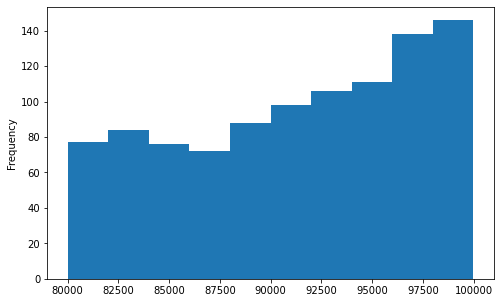

In [24]:
df2['Balance'].plot(kind='hist', figsize=(8,5))

## 11. Describing the conditions with isin

조건문은 다양한 값을 가질수도 있습니다. 특정한 값을 가지는 조건을 걸고 싶을 때 `isin`함수를 사용하는 것이 효과적입니다. 원하는 값을 지정함을 통해 원하는 행을 추출할 수 있습니다.

In [25]:
df[df['Tenure'].isin([4,6,9,10])][:3]

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Germany,Female,29,4,115046.74,4,1,0,119346.88,1.0
8,France,Male,44,4,142051.07,2,0,1,74940.50,0.0
10,France,Male,31,6,102016.72,2,0,0,80181.12,0.0


## 12. Groupby Function

`pandas`의 `groupby` 함수는 데이터의 전체적인 모습을 알 수 있는 쉽고 강력한 함수입니다. column간의 관계를 통해 원하는 column의 값을 추출할 수 있습니다.

```python
# Geography, Gender, Exited에 대해 Geography, Gender로 그룹에 대해 exited의 평균을 계산합니다.
```

In [26]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).mean()

Exited
Geography Gender          
France    Female  0.203097
          Male    0.127319
Germany   Female  0.375421
          Male    0.278751
Spain     Female  0.211592
          Male    0.131598

## 13. Applying multiple aggregate functions with groupby

`agg` 함수는 group에 대해 여러개의 `agg` 함수를 동시에 적용할 수 있습니다.
계산하고자 하는 함수를 list에 넣어 argument로 사용할 수 있습니다.

In [27]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203097  2260
          Male    0.127319  2749
Germany   Female  0.375421  1188
          Male    0.278751  1313
Spain     Female  0.211592  1087
          Male    0.131598  1383

## 14. Applying different aggregate functions to different groups

같은 함수를 모든 column에 대해 적용할 필요는 없습니다. 

예를 들어, 우리가 각각의 나라에 대해 balance의 평균값과 churned customer의 total number를 알고 싶을 때 특정 column에 대해 특정 함수를 적용함이 가능합니다. dictionary의 형태를 통해 어떤 함수를 어떤 column에 사용할지 특정합니다.

In [28]:
df_summary = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg({'Exited':'sum', 'Balance':'mean'})

df_summary.rename(columns={'Exited':'# of churned customers', 'Balance':'Average Balance of Customers'},inplace=True)
df_summary

,# of churned customers,Average Balance of Customers
Geography,,
France,809.0,62096.724733
Germany,812.0,119712.867113
Spain,412.0,61772.726429


In [29]:
df_summary = df[['Geography','Exited','Balance']].groupby('Geography')\
.agg(
Number_of_churned_customers = pd.NamedAgg('Exited', 'sum'),
Average_balance_of_customers = pd.NamedAgg('Balance', 'mean')
)

df_summary

,Number_of_churned_customers,Average_balance_of_customers
Geography,,
France,809.0,62096.724733
Germany,812.0,119712.867113
Spain,412.0,61772.726429


## 15. Reset the index

데이터 프레임의 `index`는 `groupby`를 적용한 경우 group의 이름을 반환합니다. 따라서 `reset_index` 함수를 통해 그룹 `index`를 변환합니다.

In [30]:
df_new = df[['Geography','Exited','Balance']]\
.groupby(['Geography','Exited']).mean()

df_new

Balance
Geography Exited               
France    0.0      60327.697536
          1.0      71280.796712
Germany   0.0     119400.366240
          1.0     120362.884323
Spain     0.0      59645.271822
          1.0      72399.672015

In [31]:
df_new = df_new.reset_index()
df_new

,Geography,Exited,Balance
0,France,0.0,60327.697536
1,France,1.0,71280.796712
2,Germany,0.0,119400.366240
3,Germany,1.0,120362.884323
4,Spain,0.0,59645.271822
5,Spain,1.0,72399.672015


## 16. Reset the index with a drop

어떤 경우에는 index를 reset하는 동시에 기존의 index를 삭제해야하는 경우가 있습니다.

아래의 경우 sample이 기존 index의 값을 그대로 가지고 있기에 추출과 동시에 index 삭제를 진행하려면 `index`를 `drop`해주어야 합니다.

In [32]:
df[['Geography','Exited','Balance']].sample(n=6).reset_index()

,index,Geography,Exited,Balance
0,9244,Germany,0.0,132837.70
1,2733,France,0.0,131354.25
2,9121,France,0.0,0.00
3,2998,France,0.0,142669.93
4,4269,France,0.0,112610.77
5,8800,France,0.0,149405.18


In [33]:
df[['Geography','Exited','Balance']].sample(n=6).reset_index(drop=True)

,Geography,Exited,Balance
0,France,0.0,129596.77
1,Germany,1.0,115488.52
2,France,0.0,0.00
3,Germany,0.0,101744.84
4,Germany,0.0,112930.28
5,France,0.0,0.00


## 17. Set a particular column as the index

`set_index` 함수로 특정 column을 index로 지정할 수 있습니다.

In [34]:
df_new.set_index('Geography')

,Exited,Balance
Geography,,
France,0.0,60327.697536
France,1.0,71280.796712
Germany,0.0,119400.366240
Germany,1.0,120362.884323
Spain,0.0,59645.271822
Spain,1.0,72399.672015


## 18. Inserting a new column

아래와 같은 방식을 통해 데이터 프레임에 새로운 column을 추가할 수 있습니다.

In [35]:
group = np.random.randint(10, size=6)
df_new['Group'] = group
df_new

,Geography,Exited,Balance,Group
0,France,0.0,60327.697536,0
1,France,1.0,71280.796712,7
2,Germany,0.0,119400.366240,0
3,Germany,1.0,120362.884323,0
4,Spain,0.0,59645.271822,6
5,Spain,1.0,72399.672015,8


위의 경우 `['Group']`이 마지막에 추가되는바, `insert` 함수를 통해 새로운 column이 삽입되는 위치를 지정할 수 있습니다.

아래의 경우 첫번째 column으로 group을 삽입하고자 합니다.

In [36]:
df_new = df_new.drop(['Group'], axis=1)

In [37]:
df_new.insert(0, 'Group', group)
df_new

,Group,Geography,Exited,Balance
0,0,France,0.0,60327.697536
1,7,France,1.0,71280.796712
2,0,Germany,0.0,119400.366240
3,0,Germany,1.0,120362.884323
4,6,Spain,0.0,59645.271822
5,8,Spain,1.0,72399.672015


## 19. The where function

`where` 함수를 통해 특정 조건에 맞는 column 값을 대체할 수 있습니다.

아래의 경우 6보다 작은 그룹의 Balance 값을 0으로 대체하는 함수입니다.

```python
df.where(condition, True, False)
```

In [38]:
df_new['Balance'] = df_new['Balance'].where(df_new['Group'] >= 6, 0)
df_new

,Group,Geography,Exited,Balance
0,0,France,0.0,0.000000
1,7,France,1.0,71280.796712
2,0,Germany,0.0,0.000000
3,0,Germany,1.0,0.000000
4,6,Spain,0.0,59645.271822
5,8,Spain,1.0,72399.672015


In [39]:
df_new.query('Balance < 6')

,Group,Geography,Exited,Balance
0,0,France,0.0,0.0
2,0,Germany,0.0,0.0
3,0,Germany,1.0,0.0


## 20. The rank function

`rank`함수는 각각의 값에 rank를 assign 합니다.

In [40]:
df_new['rank'] = df_new['Balance'].rank(method='first', ascending=False).astype('int')
df_new

,Group,Geography,Exited,Balance,rank
0,0,France,0.0,0.000000,4
1,7,France,1.0,71280.796712,2
2,0,Germany,0.0,0.000000,5
3,0,Germany,1.0,0.000000,6
4,6,Spain,0.0,59645.271822,3
5,8,Spain,1.0,72399.672015,1


## 21. Number of unique values in a column

`nunique` 함수를 통해 column에 존재하는 유일한 값의 개수를 반환받을 수 있습니다.

In [41]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [42]:
df.Geography.nunique()

3

## 22. Memory Usage

`memory_usage` 함수를 통해 메모리 사용량을 반환받습니다.

In [43]:
df.memory_usage()

Index              79840
Geography          79840
Gender             79840
Age                79840
Tenure             79840
Balance            79840
NumOfProducts      79840
HasCrCard          79840
IsActiveMember     79840
EstimatedSalary    79840
Exited             79840
dtype: int64

## 23. The category data type

`astype` 함수를 통해 column 값의 data type을 변환할 수 있습니다.

Object type의 데이터를 category type의 데이터로 변환할 경우 메모리 사용량이 줄어듭니다.
머신러닝 및 딥러닝 학습 시에 메모리 사용량을 줄이고 싶다면 data type을 변환시킬 수 있을 것입니다.

In [44]:
df['Geography'] = df['Geography'].astype('category')
df.memory_usage()

Index              79840
Geography          10112
Gender             79840
Age                79840
Tenure             79840
Balance            79840
NumOfProducts      79840
HasCrCard          79840
IsActiveMember     79840
EstimatedSalary    79840
Exited             79840
dtype: int64

## 24. Replacing values

`replace` 함수를 통해 값을 대체합니다.

In [45]:
df_new['Group'].replace(3, 'B1')

0    0
1    7
2    0
3    0
4    6
5    8
Name: Group, dtype: int64

## 25. Drawing a histogram

pandas는 데이터 시각화 라이브러리는 아니지만 기초적인 plot을 그릴 수 있는 툴은 제공해줍니다. 때로는 pandas를 통해 기초적인 시각화를 하는 것이 다른 라이브러리를 사용하는 것보다 간편합니다.

<AxesSubplot:title={'center':'Customer Balance'}, ylabel='Frequency'>

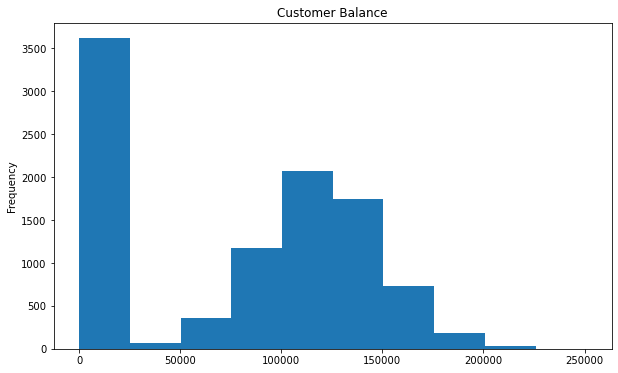

In [46]:
df['Balance'].plot(kind='hist', figsize=(10,6), title='Customer Balance')

## 26. Reducing the decimal points of floats

`round` 함수를 통해 보여줄 소숫점 자리수를 정할 수 있습니다.

In [47]:
df_new.round(1) #number of desired decimal points

,Group,Geography,Exited,Balance,rank
0,0,France,0.0,0.0,4
1,7,France,1.0,71280.8,2
2,0,Germany,0.0,0.0,5
3,0,Germany,1.0,0.0,6
4,6,Spain,0.0,59645.3,3
5,8,Spain,1.0,72399.7,1


## 27. Changing the display options

- get_option : 현재 옵션이 무엇인지 반환합니다.
- set_option : 현재의 옵션을 변경합니다.

In [48]:
pd.get_option("display.precision")

6

In [49]:
pd.set_option("display.precision",2)

In [50]:
df_new

,Group,Geography,Exited,Balance,rank
0,0,France,0.0,0.00,4
1,7,France,1.0,71280.80,2
2,0,Germany,0.0,0.00,5
3,0,Germany,1.0,0.00,6
4,6,Spain,0.0,59645.27,3
5,8,Spain,1.0,72399.67,1


## 28. Calculating the percentage change through a column

`pct_change` 함수를 통해 각각의 series의 percentage change rate를 반환받을 수 있습니다.

In [51]:
ser = pd.Series([4,5,2,5,6,10,12])
ser.pct_change()

0     NaN
1    0.25
2   -0.60
3    1.50
4    0.20
5    0.67
6    0.20
dtype: float64

## 29. Filtering based on strings

string에 따라 조건을 줄 수 있습니다.

In [52]:
df_new['Names'] = ['jack', 'julia', 'mike', 'michael', 'tim', 'amber']
df_new

,Group,Geography,Exited,Balance,rank,Names
0,0,France,0.0,0.00,4,jack
1,7,France,1.0,71280.80,2,julia
2,0,Germany,0.0,0.00,5,mike
3,0,Germany,1.0,0.00,6,michael
4,6,Spain,0.0,59645.27,3,tim
5,8,Spain,1.0,72399.67,1,amber


In [53]:
df_new[df_new.Names.str.startswith('mi')]

,Group,Geography,Exited,Balance,rank,Names
2,0,Germany,0.0,0.0,5,mike
3,0,Germany,1.0,0.0,6,michael


## 30. Styling a dataframe

`Style`과 `Styler`를 통해 Display Setting을 변경할 수 있습니다.

In [54]:
df_new.style.highlight_max(axis=0, color='darkgreen')

,Group,Geography,Exited,Balance,rank,Names
0,0,France,0.00,0.00,4,jack
1,7,France,1.00,71280.80,2,julia
2,0,Germany,0.00,0.00,5,mike
3,0,Germany,1.00,0.00,6,michael
4,6,Spain,0.00,59645.27,3,tim
5,8,Spain,1.00,72399.67,1,amber


## Conclusion

We have covered a great deal of the functions and methods for data analysis. There are, of course, a lot more offered by pandas but it is impossible to cover all in one article.

As you keep using pandas for your data analysis tasks, you may discover new functions and methods. As with any other subject, practice makes perfect.

I’d like to share two other posts that kind of cover different operations than the ones in this post.